In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = iris.data[ ["petal width (cm)"]].values
X.shape

(150, 1)

In [10]:
y = iris.target_names[iris.target] == 'virginica'
# y

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2025)

# Logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
log_reg.coef_, log_reg.intercept_

(array([[4.01034199]]), array([-6.73450957]))

# prediction

In [14]:
X_new = [[2]]

y_new_proba = log_reg.predict_proba(X_new)
y_new_proba

array([[0.21650104, 0.78349896]])

In [15]:
np.exp(1.3)/(np.exp(1.3)+1)

np.float64(0.7858349830425586)

In [16]:
log_reg.predict(X_new)

array([ True])

In [17]:
X_new_2 = [[1.5]]
log_reg.predict(X_new_2)

array([False])

In [19]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new.shape

(1000, 1)

In [20]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.99881225, 0.00118775],
       [0.99879788, 0.00120212],
       [0.99878333, 0.00121667],
       ...,
       [0.00510493, 0.99489507],
       [0.00504413, 0.99495587],
       [0.00498405, 0.99501595]])

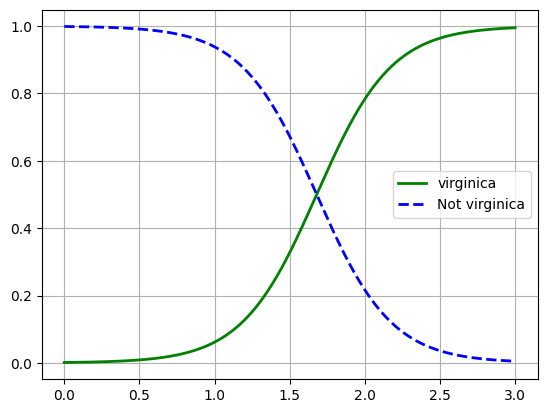

In [23]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label = "virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label = "Not virginica")
plt.legend()
plt.grid()
plt.show()